# #Data Analysis and Visualization using Altair

In [1]:
import altair as alt
from vega_datasets import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
mycar= data.cars()
mycar.head()


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [3]:
mycar['Year']

0     1970-01-01
1     1970-01-01
2     1970-01-01
3     1970-01-01
4     1970-01-01
         ...    
401   1982-01-01
402   1982-01-01
403   1982-01-01
404   1982-01-01
405   1982-01-01
Name: Year, Length: 406, dtype: datetime64[ns]

In [4]:
max(mycar.Year)


Timestamp('1982-01-01 00:00:00')

In [5]:
min(mycar.Year)

Timestamp('1970-01-01 00:00:00')

### Explore the dataset

In [6]:
#check size of dataset ,how many rows and columns
mycar.shape

(406, 9)

In [7]:
#understand the variables and its datatypes
mycar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              406 non-null    object        
 1   Miles_per_Gallon  398 non-null    float64       
 2   Cylinders         406 non-null    int64         
 3   Displacement      406 non-null    float64       
 4   Horsepower        400 non-null    float64       
 5   Weight_in_lbs     406 non-null    int64         
 6   Acceleration      406 non-null    float64       
 7   Year              406 non-null    datetime64[ns]
 8   Origin            406 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 28.7+ KB


In [8]:
mycar.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


### Data Cleaning

In [9]:
#check for any missing values
mycar.isnull().count()

Name                406
Miles_per_Gallon    406
Cylinders           406
Displacement        406
Horsepower          406
Weight_in_lbs       406
Acceleration        406
Year                406
Origin              406
dtype: int64

In [10]:
#Check for any duplicate values
mycar.duplicated(subset=None,keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
401    False
402    False
403    False
404    False
405    False
Length: 406, dtype: bool

#Above dataset[CARS] does not have any missing values or duplicate values

In [11]:
mycar['Name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
peugeot 504            4
                      ..
plymouth fury          1
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
chevy s-10             1
Name: Name, Length: 311, dtype: int64

In [12]:
newvar=pd.crosstab(mycar['Miles_per_Gallon'],mycar['Horsepower'])
newvar.tail(10)

Horsepower,46.0,48.0,49.0,52.0,53.0,54.0,58.0,60.0,61.0,62.0,...,190.0,193.0,198.0,200.0,208.0,210.0,215.0,220.0,225.0,230.0
Miles_per_Gallon,,,,,,,,,,,,,,,,,,,,,
39.1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43.4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44.3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#check for correlation among features
corrdata=mycar.corr()


<AxesSubplot:>

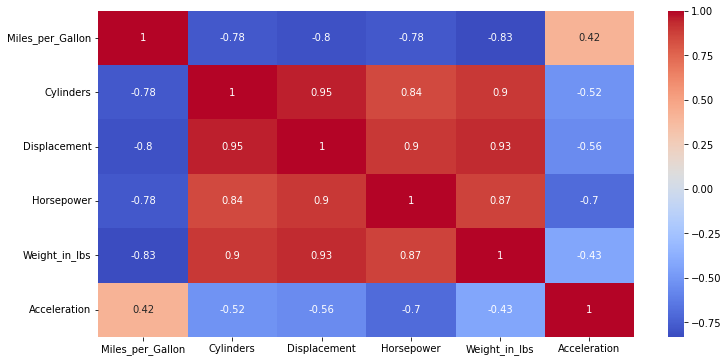

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(corrdata,annot=True,cmap='coolwarm')

In [15]:
#check for unique country names
countries=mycar['Origin']
noofcts=countries.unique()
noofcts

array(['USA', 'Europe', 'Japan'], dtype=object)

In [16]:
#calculate total number of record for particular country
ccounts =mycar['Origin'].value_counts()
ccounts

USA       254
Japan      79
Europe     73
Name: Origin, dtype: int64

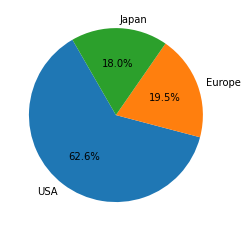

In [17]:
plt.pie(ccounts,labels=noofcts,autopct='%0.1f%%',startangle=120)
plt.show()

## Visual Analytics using Altair

In [18]:
#Simple charts

alt.Chart(mycar).mark_circle().encode(
    y='Horsepower:Q',
    x='Miles_per_Gallon:Q',
    color='Origin:N'
  )

alt.Chart(...)

In [19]:
alt.Chart(mycar).mark_line().encode(
    x='Weight_in_lbs:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
)  
    

alt.Chart(...)

In [20]:
alt.Chart(mycar).mark_bar().encode(
    x='Weight_in_lbs:Q',
    y='Displacement:Q',
    color='Origin:N'
    
)

alt.Chart(...)

In [21]:
alt.Chart(mycar).mark_bar().encode(
    alt.X('Miles_per_Gallon', bin=True),
    y='Horsepower:Q'
)  

alt.Chart(...)

In [22]:
alt.Chart(mycar).mark_bar().encode(
    alt.X('Acceleration', bin=True),
    y='Horsepower:Q'
)

alt.Chart(...)

In [23]:
years = mycar['Year']
years

0     1970-01-01
1     1970-01-01
2     1970-01-01
3     1970-01-01
4     1970-01-01
         ...    
401   1982-01-01
402   1982-01-01
403   1982-01-01
404   1982-01-01
405   1982-01-01
Name: Year, Length: 406, dtype: datetime64[ns]

In [24]:
alt.Chart(mycar).mark_bar().encode(
    alt.X('year(Year):T',title='Date',bin=True),
    y ='count()',
    color='Origin:N'
).interactive()

alt.Chart(...)

In [25]:
alt.Chart(mycar).mark_point().encode(
    x='Acceleration',
    y='Horsepower',
    color='Origin:N'
).interactive()

alt.Chart(...)

## Interactive charts

In [26]:
brush = alt.selection(type='interval')

#create top panel using mark_point()chart

points = alt.Chart(mycar).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color =alt.condition(brush,'Origin:N',alt.value('lightgrey'))
).properties(
    width=400,
    height=600
).add_selection(
    brush
)

points

bars = alt.Chart(mycar).mark_bar().encode(
    y='Origin:N',
    x='count(Origin):Q',
    color ='Origin:N'
).transform_filter(
    brush
)

alt.hconcat(points,bars,data=mycar)


alt.HConcatChart(...)